In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('HEART (3).csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#Since random forest has proven to provide the best results we plan to consider the top eight features of random forest
# for our work in Artificial neural networks
df_top8 = df.loc[:,['cp','oldpeak','thal','ca','thalach','age','chol','trestbps','exang']]

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


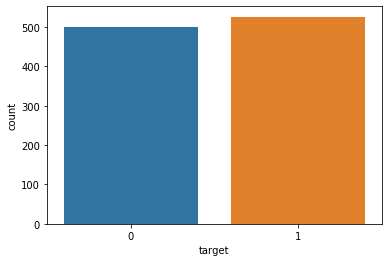

In [7]:
sns.countplot(x='target',data=df)

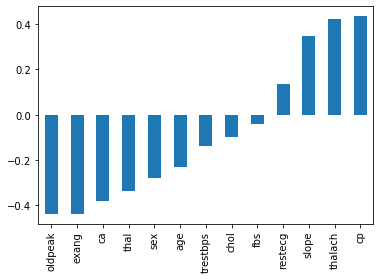

In [8]:
df.corr()['target'][:-1].sort_values().plot(kind='bar')

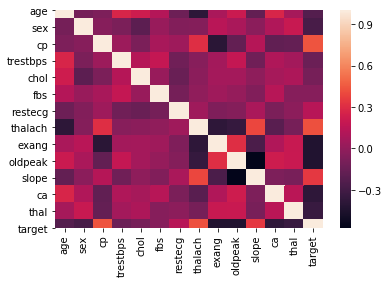

In [9]:
sns.heatmap(df.corr())

In [10]:
X=df.drop('target',axis=1).values
y=df['target'].values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler=MinMaxScaler()

In [15]:
X_train=scaler.fit_transform(X_train)

In [16]:
X_test=scaler.transform(X_test)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [18]:
X_train.shape

(717, 13)

In [19]:
model=Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

# BINARY CALSSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [20]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test))

Train on 717 samples, validate on 308 samples
Epoch 1/600
717/717 [==============================] - 1s 1ms/sample - loss: 0.7255 - val_loss: 0.6886
Epoch 2/600
717/717 [==============================] - 0s 81us/sample - loss: 0.6516 - val_loss: 0.6218
Epoch 3/600
717/717 [==============================] - 0s 106us/sample - loss: 0.5924 - val_loss: 0.5748
Epoch 4/600
717/717 [==============================] - 0s 81us/sample - loss: 0.5443 - val_loss: 0.5293
Epoch 5/600
717/717 [==============================] - 0s 85us/sample - loss: 0.4962 - val_loss: 0.4881
Epoch 6/600
717/717 [==============================] - 0s 78us/sample - loss: 0.4568 - val_loss: 0.4550
Epoch 7/600
717/717 [==============================] - 0s 88us/sample - loss: 0.4255 - val_loss: 0.4285
Epoch 8/600
717/717 [==============================] - 0s 88us/sample - loss: 0.4041 - val_loss: 0.4123
Epoch 9/600
717/717 [==============================] - 0s 85us/sample - loss: 0.3883 - val_loss: 0.4014
Epoch 10/600
717/7

717/717 [==============================] - 0s 82us/sample - loss: 0.2401 - val_loss: 0.2866
Epoch 79/600
717/717 [==============================] - 0s 70us/sample - loss: 0.2295 - val_loss: 0.2861
Epoch 80/600
717/717 [==============================] - 0s 79us/sample - loss: 0.2313 - val_loss: 0.2934
Epoch 81/600
717/717 [==============================] - 0s 79us/sample - loss: 0.2269 - val_loss: 0.2837
Epoch 82/600
717/717 [==============================] - 0s 77us/sample - loss: 0.2279 - val_loss: 0.2852
Epoch 83/600
717/717 [==============================] - 0s 77us/sample - loss: 0.2267 - val_loss: 0.2844
Epoch 84/600
717/717 [==============================] - 0s 78us/sample - loss: 0.2242 - val_loss: 0.2826
Epoch 85/600
717/717 [==============================] - 0s 82us/sample - loss: 0.2224 - val_loss: 0.2796
Epoch 86/600
717/717 [==============================] - 0s 79us/sample - loss: 0.2238 - val_loss: 0.2825
Epoch 87/600
717/717 [==============================] - 0s 81us/samp

717/717 [==============================] - 0s 83us/sample - loss: 0.1722 - val_loss: 0.2287
Epoch 156/600
717/717 [==============================] - 0s 75us/sample - loss: 0.1622 - val_loss: 0.2233
Epoch 157/600
717/717 [==============================] - 0s 82us/sample - loss: 0.1623 - val_loss: 0.2274
Epoch 158/600
717/717 [==============================] - 0s 80us/sample - loss: 0.1607 - val_loss: 0.2266
Epoch 159/600
717/717 [==============================] - 0s 81us/sample - loss: 0.1666 - val_loss: 0.2187
Epoch 160/600
717/717 [==============================] - 0s 85us/sample - loss: 0.1600 - val_loss: 0.2191
Epoch 161/600
717/717 [==============================] - 0s 81us/sample - loss: 0.1602 - val_loss: 0.2264
Epoch 162/600
717/717 [==============================] - 0s 79us/sample - loss: 0.1629 - val_loss: 0.2178
Epoch 163/600
717/717 [==============================] - 0s 83us/sample - loss: 0.1558 - val_loss: 0.2200
Epoch 164/600
717/717 [==============================] - 0s 

717/717 [==============================] - 0s 77us/sample - loss: 0.1102 - val_loss: 0.1629
Epoch 233/600
717/717 [==============================] - 0s 80us/sample - loss: 0.1078 - val_loss: 0.1658
Epoch 234/600
717/717 [==============================] - 0s 77us/sample - loss: 0.1075 - val_loss: 0.1639
Epoch 235/600
717/717 [==============================] - 0s 78us/sample - loss: 0.1051 - val_loss: 0.1604
Epoch 236/600
717/717 [==============================] - 0s 79us/sample - loss: 0.1054 - val_loss: 0.1609
Epoch 237/600
717/717 [==============================] - 0s 86us/sample - loss: 0.1082 - val_loss: 0.1615
Epoch 238/600
717/717 [==============================] - 0s 82us/sample - loss: 0.1035 - val_loss: 0.1563
Epoch 239/600
717/717 [==============================] - 0s 81us/sample - loss: 0.1044 - val_loss: 0.1663
Epoch 240/600
717/717 [==============================] - 0s 80us/sample - loss: 0.1042 - val_loss: 0.1749
Epoch 241/600
717/717 [==============================] - 0s 

717/717 [==============================] - 0s 76us/sample - loss: 0.0712 - val_loss: 0.1134
Epoch 310/600
717/717 [==============================] - 0s 80us/sample - loss: 0.0673 - val_loss: 0.1065
Epoch 311/600
717/717 [==============================] - 0s 83us/sample - loss: 0.0662 - val_loss: 0.1071
Epoch 312/600
717/717 [==============================] - 0s 87us/sample - loss: 0.0666 - val_loss: 0.1050
Epoch 313/600
717/717 [==============================] - 0s 86us/sample - loss: 0.0652 - val_loss: 0.1087
Epoch 314/600
717/717 [==============================] - 0s 86us/sample - loss: 0.0673 - val_loss: 0.1045
Epoch 315/600
717/717 [==============================] - 0s 77us/sample - loss: 0.0650 - val_loss: 0.1023
Epoch 316/600
717/717 [==============================] - 0s 80us/sample - loss: 0.0650 - val_loss: 0.1026
Epoch 317/600
717/717 [==============================] - 0s 78us/sample - loss: 0.0645 - val_loss: 0.1019
Epoch 318/600
717/717 [==============================] - 0s 

717/717 [==============================] - 0s 82us/sample - loss: 0.0551 - val_loss: 0.0746
Epoch 387/600
717/717 [==============================] - 0s 83us/sample - loss: 0.0469 - val_loss: 0.0723
Epoch 388/600
717/717 [==============================] - 0s 88us/sample - loss: 0.0436 - val_loss: 0.0655
Epoch 389/600
717/717 [==============================] - 0s 80us/sample - loss: 0.0435 - val_loss: 0.0743
Epoch 390/600
717/717 [==============================] - 0s 80us/sample - loss: 0.0447 - val_loss: 0.0698
Epoch 391/600
717/717 [==============================] - 0s 79us/sample - loss: 0.0451 - val_loss: 0.0653
Epoch 392/600
717/717 [==============================] - 0s 79us/sample - loss: 0.0442 - val_loss: 0.0702
Epoch 393/600
717/717 [==============================] - 0s 79us/sample - loss: 0.0507 - val_loss: 0.0737
Epoch 394/600
717/717 [==============================] - 0s 83us/sample - loss: 0.0537 - val_loss: 0.0695
Epoch 395/600
717/717 [==============================] - 0s 

717/717 [==============================] - 0s 84us/sample - loss: 0.0325 - val_loss: 0.0464
Epoch 464/600
717/717 [==============================] - 0s 80us/sample - loss: 0.0311 - val_loss: 0.0397
Epoch 465/600
717/717 [==============================] - 0s 83us/sample - loss: 0.0295 - val_loss: 0.0382
Epoch 466/600
717/717 [==============================] - 0s 79us/sample - loss: 0.0296 - val_loss: 0.0552
Epoch 467/600
717/717 [==============================] - 0s 82us/sample - loss: 0.0292 - val_loss: 0.0392
Epoch 468/600
717/717 [==============================] - 0s 82us/sample - loss: 0.0284 - val_loss: 0.0383
Epoch 469/600
717/717 [==============================] - 0s 78us/sample - loss: 0.0281 - val_loss: 0.0375
Epoch 470/600
717/717 [==============================] - 0s 80us/sample - loss: 0.0354 - val_loss: 0.0401
Epoch 471/600
717/717 [==============================] - 0s 81us/sample - loss: 0.0313 - val_loss: 0.0358
Epoch 472/600
717/717 [==============================] - 0s 

717/717 [==============================] - 0s 86us/sample - loss: 0.0175 - val_loss: 0.0218
Epoch 541/600
717/717 [==============================] - 0s 75us/sample - loss: 0.0182 - val_loss: 0.0207
Epoch 542/600
717/717 [==============================] - 0s 80us/sample - loss: 0.0173 - val_loss: 0.0209
Epoch 543/600
717/717 [==============================] - 0s 80us/sample - loss: 0.0182 - val_loss: 0.0216
Epoch 544/600
717/717 [==============================] - 0s 79us/sample - loss: 0.0175 - val_loss: 0.0207
Epoch 545/600
717/717 [==============================] - 0s 82us/sample - loss: 0.0172 - val_loss: 0.0205
Epoch 546/600
717/717 [==============================] - 0s 81us/sample - loss: 0.0201 - val_loss: 0.0257
Epoch 547/600
717/717 [==============================] - 0s 82us/sample - loss: 0.0172 - val_loss: 0.0206
Epoch 548/600
717/717 [==============================] - 0s 82us/sample - loss: 0.0167 - val_loss: 0.0204
Epoch 549/600
717/717 [==============================] - 0s 

In [21]:
losses=pd.DataFrame(model.history.history)

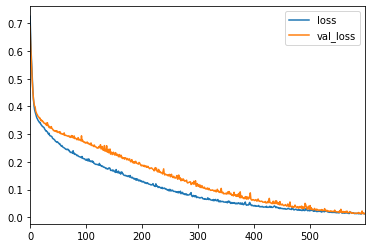

In [22]:
losses.plot()

In [23]:
model=Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

# BINARY CALSSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [26]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Train on 717 samples, validate on 308 samples
Epoch 1/600
717/717 [==============================] - 1s 1ms/sample - loss: 0.6769 - val_loss: 0.6425
Epoch 2/600
717/717 [==============================] - 0s 111us/sample - loss: 0.6122 - val_loss: 0.5932
Epoch 3/600
717/717 [==============================] - 0s 111us/sample - loss: 0.5567 - val_loss: 0.5406
Epoch 4/600
717/717 [==============================] - 0s 100us/sample - loss: 0.5030 - val_loss: 0.4954
Epoch 5/600
717/717 [==============================] - 0s 91us/sample - loss: 0.4562 - val_loss: 0.4581
Epoch 6/600
717/717 [==============================] - 0s 90us/sample - loss: 0.4185 - val_loss: 0.4273
Epoch 7/600
717/717 [==============================] - ETA: 0s - loss: 0.358 - 0s 86us/sample - loss: 0.3929 - val_loss: 0.4071
Epoch 8/600
717/717 [==============================] - 0s 81us/sample - loss: 0.3766 - val_loss: 0.3936
Epoch 9/600
717/717 [==============================] - 0s 83us/sample - loss: 0.3681 - val_loss:

717/717 [==============================] - 0s 75us/sample - loss: 0.2118 - val_loss: 0.2658
Epoch 79/600
717/717 [==============================] - 0s 83us/sample - loss: 0.2118 - val_loss: 0.2763
Epoch 80/600
717/717 [==============================] - 0s 88us/sample - loss: 0.2113 - val_loss: 0.2626
Epoch 81/600
717/717 [==============================] - 0s 71us/sample - loss: 0.2097 - val_loss: 0.2632
Epoch 82/600
717/717 [==============================] - 0s 75us/sample - loss: 0.2077 - val_loss: 0.2618
Epoch 83/600
717/717 [==============================] - 0s 80us/sample - loss: 0.2094 - val_loss: 0.2595
Epoch 84/600
717/717 [==============================] - 0s 75us/sample - loss: 0.2066 - val_loss: 0.2616
Epoch 85/600
717/717 [==============================] - 0s 75us/sample - loss: 0.2066 - val_loss: 0.2641
Epoch 86/600
717/717 [==============================] - 0s 79us/sample - loss: 0.2050 - val_loss: 0.2575
Epoch 87/600
717/717 [==============================] - 0s 80us/samp

717/717 [==============================] - 0s 79us/sample - loss: 0.1451 - val_loss: 0.2111
Epoch 156/600
717/717 [==============================] - 0s 77us/sample - loss: 0.1484 - val_loss: 0.2118
Epoch 157/600
717/717 [==============================] - 0s 75us/sample - loss: 0.1433 - val_loss: 0.2050
Epoch 158/600
717/717 [==============================] - 0s 74us/sample - loss: 0.1494 - val_loss: 0.2009
Epoch 159/600
717/717 [==============================] - 0s 75us/sample - loss: 0.1442 - val_loss: 0.2217
Epoch 160/600
717/717 [==============================] - 0s 74us/sample - loss: 0.1437 - val_loss: 0.2055
Epoch 161/600
717/717 [==============================] - 0s 73us/sample - loss: 0.1410 - val_loss: 0.1998
Epoch 162/600
717/717 [==============================] - 0s 73us/sample - loss: 0.1386 - val_loss: 0.2027
Epoch 163/600
717/717 [==============================] - 0s 75us/sample - loss: 0.1364 - val_loss: 0.2045
Epoch 164/600
717/717 [==============================] - 0s 

717/717 [==============================] - 0s 95us/sample - loss: 0.0998 - val_loss: 0.1597
Epoch 233/600
717/717 [==============================] - 0s 102us/sample - loss: 0.0972 - val_loss: 0.1664
Epoch 234/600
717/717 [==============================] - 0s 100us/sample - loss: 0.1028 - val_loss: 0.1663
Epoch 235/600
717/717 [==============================] - 0s 89us/sample - loss: 0.0978 - val_loss: 0.1648
Epoch 236/600
717/717 [==============================] - 0s 103us/sample - loss: 0.1003 - val_loss: 0.1688
Epoch 237/600
717/717 [==============================] - 0s 124us/sample - loss: 0.0970 - val_loss: 0.1585
Epoch 238/600
717/717 [==============================] - 0s 107us/sample - loss: 0.0938 - val_loss: 0.1555
Epoch 239/600
717/717 [==============================] - 0s 88us/sample - loss: 0.1007 - val_loss: 0.1574
Epoch 240/600
717/717 [==============================] - 0s 74us/sample - loss: 0.0933 - val_loss: 0.1596
Epoch 241/600
717/717 [==============================] 

717/717 [==============================] - 0s 88us/sample - loss: 0.0644 - val_loss: 0.1177
Epoch 310/600
717/717 [==============================] - 0s 82us/sample - loss: 0.0635 - val_loss: 0.1165
Epoch 311/600
717/717 [==============================] - 0s 79us/sample - loss: 0.0625 - val_loss: 0.1166
Epoch 312/600
717/717 [==============================] - 0s 78us/sample - loss: 0.0610 - val_loss: 0.1181
Epoch 313/600
717/717 [==============================] - 0s 84us/sample - loss: 0.0697 - val_loss: 0.1184
Epoch 314/600
717/717 [==============================] - 0s 120us/sample - loss: 0.0661 - val_loss: 0.1188
Epoch 315/600
717/717 [==============================] - 0s 163us/sample - loss: 0.0632 - val_loss: 0.1139
Epoch 316/600
717/717 [==============================] - 0s 143us/sample - loss: 0.0619 - val_loss: 0.1209
Epoch 317/600
717/717 [==============================] - 0s 90us/sample - loss: 0.0749 - val_loss: 0.1290
Epoch 318/600
717/717 [==============================] - 

717/717 [==============================] - 0s 82us/sample - loss: 0.0418 - val_loss: 0.0893
Epoch 387/600
717/717 [==============================] - 0s 81us/sample - loss: 0.0427 - val_loss: 0.0969
Epoch 388/600
717/717 [==============================] - 0s 80us/sample - loss: 0.0418 - val_loss: 0.0863
Epoch 389/600
717/717 [==============================] - 0s 81us/sample - loss: 0.0419 - val_loss: 0.0848
Epoch 390/600
717/717 [==============================] - 0s 81us/sample - loss: 0.0581 - val_loss: 0.1051
Epoch 391/600
717/717 [==============================] - 0s 78us/sample - loss: 0.0586 - val_loss: 0.1106
Epoch 392/600
717/717 [==============================] - 0s 82us/sample - loss: 0.0482 - val_loss: 0.0837
Epoch 393/600
717/717 [==============================] - 0s 82us/sample - loss: 0.0426 - val_loss: 0.0856
Epoch 394/600
717/717 [==============================] - 0s 80us/sample - loss: 0.0394 - val_loss: 0.0832
Epoch 395/600
717/717 [==============================] - 0s 

717/717 [==============================] - 0s 79us/sample - loss: 0.0275 - val_loss: 0.0723
Epoch 464/600
717/717 [==============================] - 0s 75us/sample - loss: 0.0274 - val_loss: 0.0639
Epoch 465/600
717/717 [==============================] - 0s 84us/sample - loss: 0.0320 - val_loss: 0.0738
Epoch 466/600
717/717 [==============================] - 0s 87us/sample - loss: 0.0284 - val_loss: 0.0653
Epoch 467/600
717/717 [==============================] - 0s 82us/sample - loss: 0.0279 - val_loss: 0.0628
Epoch 468/600
717/717 [==============================] - 0s 85us/sample - loss: 0.0258 - val_loss: 0.0616
Epoch 469/600
717/717 [==============================] - 0s 81us/sample - loss: 0.0269 - val_loss: 0.0706
Epoch 470/600
717/717 [==============================] - 0s 76us/sample - loss: 0.0285 - val_loss: 0.0691
Epoch 471/600
717/717 [==============================] - 0s 80us/sample - loss: 0.0246 - val_loss: 0.0609
Epoch 472/600
717/717 [==============================] - 0s 

717/717 [==============================] - 0s 82us/sample - loss: 0.0155 - val_loss: 0.0507
Epoch 541/600
717/717 [==============================] - 0s 75us/sample - loss: 0.0173 - val_loss: 0.0556
Epoch 542/600
717/717 [==============================] - 0s 82us/sample - loss: 0.0157 - val_loss: 0.0496
Epoch 543/600
717/717 [==============================] - 0s 81us/sample - loss: 0.0143 - val_loss: 0.0505
Epoch 544/600
717/717 [==============================] - 0s 83us/sample - loss: 0.0170 - val_loss: 0.0605
Epoch 545/600
717/717 [==============================] - 0s 80us/sample - loss: 0.0155 - val_loss: 0.0552
Epoch 546/600
717/717 [==============================] - 0s 77us/sample - loss: 0.0155 - val_loss: 0.0672
Epoch 547/600
717/717 [==============================] - 0s 78us/sample - loss: 0.0153 - val_loss: 0.0595
Epoch 548/600
717/717 [==============================] - 0s 82us/sample - loss: 0.0159 - val_loss: 0.0599
Epoch 549/600
717/717 [==============================] - 0s 

In [27]:
model_loss=pd.DataFrame(model.history.history)

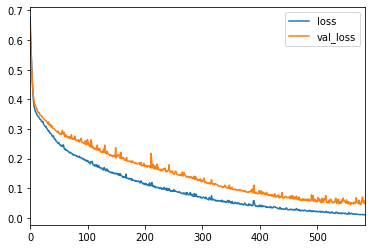

In [28]:
model_loss.plot()

In [29]:
from tensorflow.keras.layers import Dropout

In [30]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
# BINARY CALSSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [31]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Train on 717 samples, validate on 308 samples
Epoch 1/600
717/717 [==============================] - 1s 908us/sample - loss: 0.7261 - val_loss: 0.6794
Epoch 2/600
717/717 [==============================] - 0s 85us/sample - loss: 0.6950 - val_loss: 0.6638
Epoch 3/600
717/717 [==============================] - 0s 95us/sample - loss: 0.6785 - val_loss: 0.6425
Epoch 4/600
717/717 [==============================] - 0s 89us/sample - loss: 0.6480 - val_loss: 0.6186
Epoch 5/600
717/717 [==============================] - 0s 102us/sample - loss: 0.6218 - val_loss: 0.5922
Epoch 6/600
717/717 [==============================] - 0s 114us/sample - loss: 0.6330 - val_loss: 0.5729
Epoch 7/600
717/717 [==============================] - 0s 90us/sample - loss: 0.5877 - val_loss: 0.5550
Epoch 8/600
717/717 [==============================] - 0s 85us/sample - loss: 0.6038 - val_loss: 0.5395
Epoch 9/600
717/717 [==============================] - 0s 80us/sample - loss: 0.5763 - val_loss: 0.5214
Epoch 10/600
71

717/717 [==============================] - 0s 75us/sample - loss: 0.3523 - val_loss: 0.3279
Epoch 79/600
717/717 [==============================] - 0s 82us/sample - loss: 0.3533 - val_loss: 0.3258
Epoch 80/600
717/717 [==============================] - 0s 78us/sample - loss: 0.3555 - val_loss: 0.3248
Epoch 81/600
717/717 [==============================] - 0s 77us/sample - loss: 0.3351 - val_loss: 0.3246
Epoch 82/600
717/717 [==============================] - 0s 81us/sample - loss: 0.3286 - val_loss: 0.3247
Epoch 83/600
717/717 [==============================] - 0s 92us/sample - loss: 0.3701 - val_loss: 0.3244
Epoch 84/600
717/717 [==============================] - 0s 96us/sample - loss: 0.3404 - val_loss: 0.3206
Epoch 85/600
717/717 [==============================] - 0s 103us/sample - loss: 0.3434 - val_loss: 0.3201
Epoch 86/600
717/717 [==============================] - 0s 97us/sample - loss: 0.3358 - val_loss: 0.3211
Epoch 87/600
717/717 [==============================] - 0s 79us/sam

717/717 [==============================] - 0s 80us/sample - loss: 0.2716 - val_loss: 0.2746
Epoch 156/600
717/717 [==============================] - 0s 81us/sample - loss: 0.2769 - val_loss: 0.2737
Epoch 157/600
717/717 [==============================] - 0s 80us/sample - loss: 0.2778 - val_loss: 0.2732
Epoch 158/600
717/717 [==============================] - 0s 83us/sample - loss: 0.2850 - val_loss: 0.2770
Epoch 159/600
717/717 [==============================] - 0s 78us/sample - loss: 0.2986 - val_loss: 0.2722
Epoch 160/600
717/717 [==============================] - 0s 85us/sample - loss: 0.2890 - val_loss: 0.2710
Epoch 161/600
717/717 [==============================] - 0s 87us/sample - loss: 0.2528 - val_loss: 0.2688
Epoch 162/600
717/717 [==============================] - 0s 86us/sample - loss: 0.2590 - val_loss: 0.2682
Epoch 163/600
717/717 [==============================] - 0s 81us/sample - loss: 0.2861 - val_loss: 0.2712
Epoch 164/600
717/717 [==============================] - 0s 

717/717 [==============================] - 0s 82us/sample - loss: 0.2443 - val_loss: 0.2483
Epoch 233/600
717/717 [==============================] - 0s 81us/sample - loss: 0.2289 - val_loss: 0.2493
Epoch 234/600
717/717 [==============================] - 0s 85us/sample - loss: 0.2600 - val_loss: 0.2464
Epoch 235/600
717/717 [==============================] - 0s 87us/sample - loss: 0.2246 - val_loss: 0.2435
Epoch 236/600
717/717 [==============================] - 0s 81us/sample - loss: 0.2433 - val_loss: 0.2477
Epoch 237/600
717/717 [==============================] - 0s 85us/sample - loss: 0.2446 - val_loss: 0.2467
Epoch 238/600
717/717 [==============================] - 0s 81us/sample - loss: 0.2385 - val_loss: 0.2420
Epoch 239/600
717/717 [==============================] - 0s 83us/sample - loss: 0.2557 - val_loss: 0.2412
Epoch 240/600
717/717 [==============================] - 0s 81us/sample - loss: 0.2573 - val_loss: 0.2471
Epoch 241/600
717/717 [==============================] - 0s 

717/717 [==============================] - 0s 79us/sample - loss: 0.1911 - val_loss: 0.2316
Epoch 310/600
717/717 [==============================] - 0s 85us/sample - loss: 0.2112 - val_loss: 0.2277
Epoch 311/600
717/717 [==============================] - 0s 81us/sample - loss: 0.2242 - val_loss: 0.2293
Epoch 312/600
717/717 [==============================] - 0s 86us/sample - loss: 0.2111 - val_loss: 0.2352
Epoch 313/600
717/717 [==============================] - 0s 81us/sample - loss: 0.2063 - val_loss: 0.2316
Epoch 314/600
717/717 [==============================] - 0s 90us/sample - loss: 0.2248 - val_loss: 0.2344
Epoch 315/600
717/717 [==============================] - 0s 88us/sample - loss: 0.2211 - val_loss: 0.2327
Epoch 316/600
717/717 [==============================] - 0s 89us/sample - loss: 0.2209 - val_loss: 0.2293
Epoch 317/600
717/717 [==============================] - ETA: 0s - loss: 0.161 - 0s 86us/sample - loss: 0.2215 - val_loss: 0.2304
Epoch 318/600
717/717 [=============

717/717 [==============================] - 0s 92us/sample - loss: 0.2289 - val_loss: 0.2139
Epoch 387/600
717/717 [==============================] - 0s 77us/sample - loss: 0.1896 - val_loss: 0.2126
Epoch 388/600
717/717 [==============================] - 0s 82us/sample - loss: 0.2111 - val_loss: 0.2100
Epoch 389/600
717/717 [==============================] - 0s 79us/sample - loss: 0.1895 - val_loss: 0.2124
Epoch 390/600
717/717 [==============================] - 0s 81us/sample - loss: 0.1889 - val_loss: 0.2094
Epoch 391/600
717/717 [==============================] - 0s 79us/sample - loss: 0.2202 - val_loss: 0.2213
Epoch 392/600
717/717 [==============================] - 0s 78us/sample - loss: 0.1948 - val_loss: 0.2095
Epoch 393/600
717/717 [==============================] - 0s 81us/sample - loss: 0.2164 - val_loss: 0.2144
Epoch 394/600
717/717 [==============================] - 0s 82us/sample - loss: 0.2056 - val_loss: 0.2076
Epoch 395/600
717/717 [==============================] - 0s 

717/717 [==============================] - 0s 75us/sample - loss: 0.2019 - val_loss: 0.1959
Epoch 464/600
717/717 [==============================] - 0s 86us/sample - loss: 0.1900 - val_loss: 0.1874
Epoch 465/600
717/717 [==============================] - 0s 92us/sample - loss: 0.1875 - val_loss: 0.1928
Epoch 466/600
717/717 [==============================] - 0s 75us/sample - loss: 0.1656 - val_loss: 0.1911
Epoch 467/600
717/717 [==============================] - 0s 81us/sample - loss: 0.1966 - val_loss: 0.1944
Epoch 468/600
717/717 [==============================] - 0s 83us/sample - loss: 0.2079 - val_loss: 0.1915
Epoch 469/600
717/717 [==============================] - 0s 85us/sample - loss: 0.1895 - val_loss: 0.1885
Epoch 470/600
717/717 [==============================] - 0s 83us/sample - loss: 0.1636 - val_loss: 0.1916
Epoch 471/600
717/717 [==============================] - 0s 84us/sample - loss: 0.1831 - val_loss: 0.1892
Epoch 472/600
717/717 [==============================] - 0s 

In [32]:
model_loss=pd.DataFrame(model.history.history)

In [ ]:
model_loss.plot()

In [38]:
predictions=model.predict_classes(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[116  12]
 [  2 127]]


              precision    recall  f1-score   support

           0       0.98      0.91      0.94       128
           1       0.91      0.98      0.95       129

    accuracy                           0.95       257
   macro avg       0.95      0.95      0.95       257
weighted avg       0.95      0.95      0.95       257

